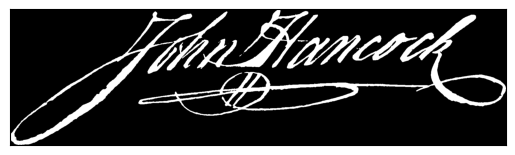

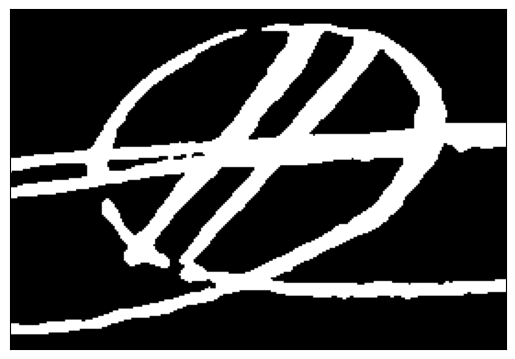

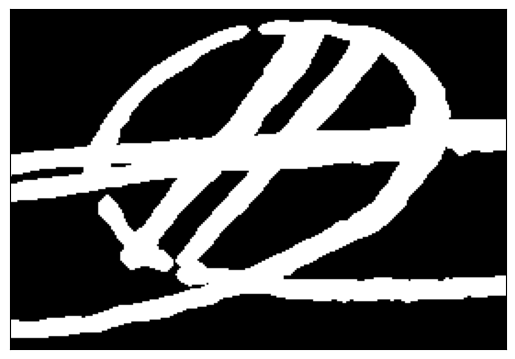

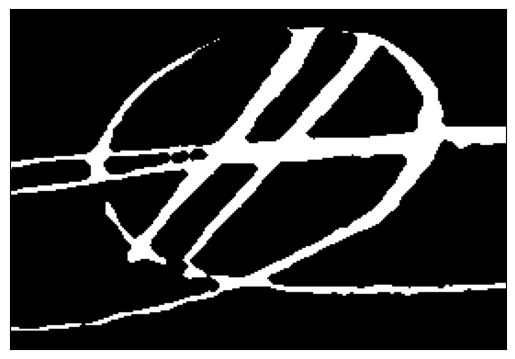

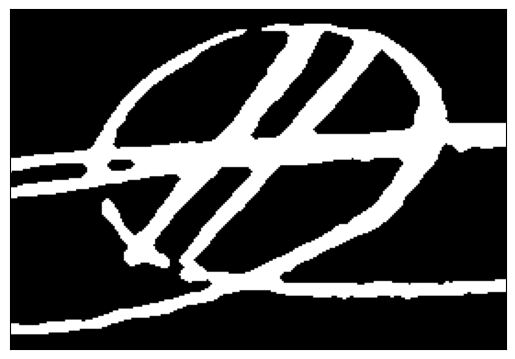

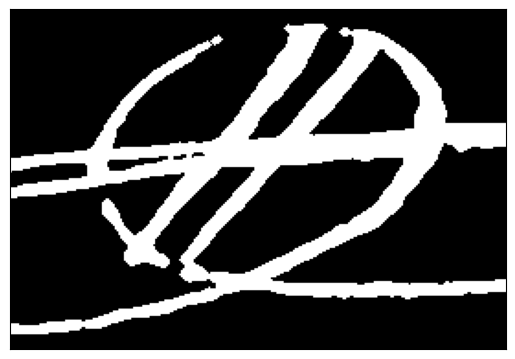

In [2]:
# %load example4-1.py
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('JohnHancocksSignature.png',cv.IMREAD_UNCHANGED) 
t,bin_img=cv.threshold(img[:,:,3],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(bin_img,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b=bin_img[235:420, 770:1040]
plt.imshow(b, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

# structuring element
se=np.uint8([[0,0,1,0,0],
             [0,1,1,1,0],
             [1,1,1,1,1],
             [0,1,1,1,0],
             [0,0,1,0,0]])

# dilation operation
b_dilation=cv.dilate(b, se, iterations=1)
plt.imshow(b_dilation, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

# erosion operation
b_erosion=cv.erode(b, se, iterations=1)
plt.imshow(b_erosion, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

# Write closing and opening operations #
b_closing=cv.erode(cv.dilate(b, se, iterations=1), se, iterations=1)
plt.imshow(b_closing, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_opening=cv.dilate(cv.erode(b, se, iterations=1), se, iterations=1)
plt.imshow(b_opening, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()


In [1]:
# %load example4-21.py
import cv2 as cv

img=cv.imread('rose.png')
patch=img[250:350,170:270,:]

img=cv.rectangle(img,(170,250),(270,350),(255,0,0),3)
patch1=cv.resize(patch,dsize=(0,0),fx=5,fy=5,
                 interpolation=cv.INTER_NEAREST)
patch2=cv.resize(patch,dsize=(0,0),fx=5,fy=5,
                 interpolation=cv.INTER_LINEAR)
patch3=cv.resize(patch,dsize=(0,0),fx=5,fy=5,
                 interpolation=cv.INTER_CUBIC)

cv.imshow('Original', img)
cv.imshow('Resize nearest', patch1)
cv.imshow('Resize bilinear', patch2)
cv.imshow('Resize bicubic', patch3)

cv.waitKey()
cv.destroyAllWindows()
